In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity



In [2]:
trip_advisor = pd.read_csv('tripadvisor_review.csv')
trip_advisor = trip_advisor.drop(['User ID'], axis=1)
trip_advisor_scaled = StandardScaler().fit_transform(trip_advisor)
trip_advisor

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


# Problem 1a

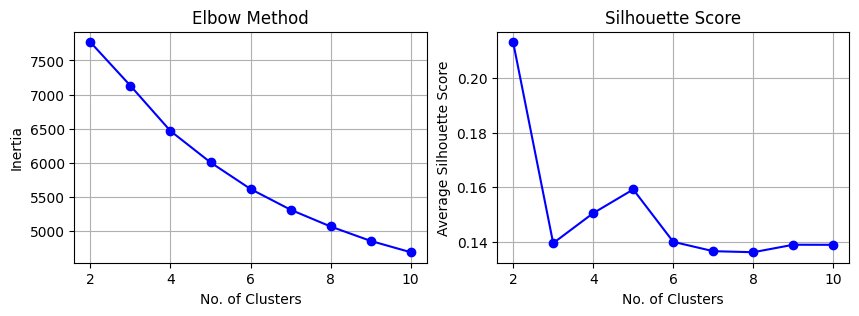

(2, 0.21315362778467906)

In [3]:
inertia_values = []
silhouette_avgs = []

k_range = range(2, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(trip_advisor_scaled)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(trip_advisor_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(np.arange(2,11),inertia_values,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(122)
plt.plot(np.arange(2,11),silhouette_avgs,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.show()

best_k = k_range[np.argmax(silhouette_avgs)]
best_k, max(silhouette_avgs)

Looking at the Silhouette score, the best K is k=2.

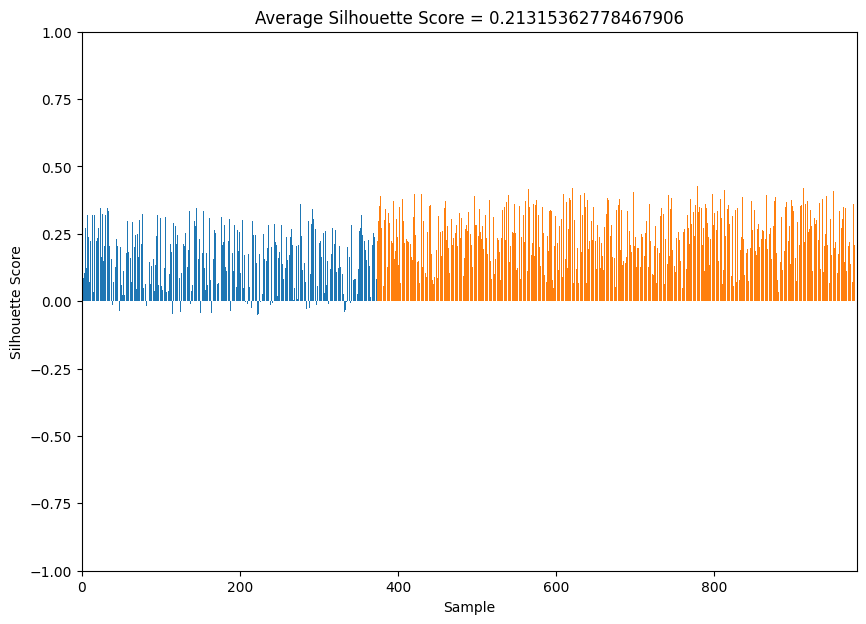

In [5]:
kmeans = KMeans(n_clusters=best_k, n_init=10)
kmeans.fit(trip_advisor_scaled)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(trip_advisor_scaled, cluster_labels)
silhouette_avg = silhouette_score(trip_advisor_scaled, cluster_labels)

plt.figure(figsize=(10, 7))

sample = 0
for i in range(0, best_k):
    sil = silhouette_values[cluster_labels == i]
    plt.bar(np.arange(sample, sample + sil.size), sil)
    sample += sil.size

plt.xlim([0, len(trip_advisor_scaled)])
plt.ylim([-1, 1])

plt.xlabel('Sample')
plt.ylabel('Silhouette Score')
plt.title(f"Average Silhouette Score = {silhouette_avg}")

plt.show()

# Problem 1b

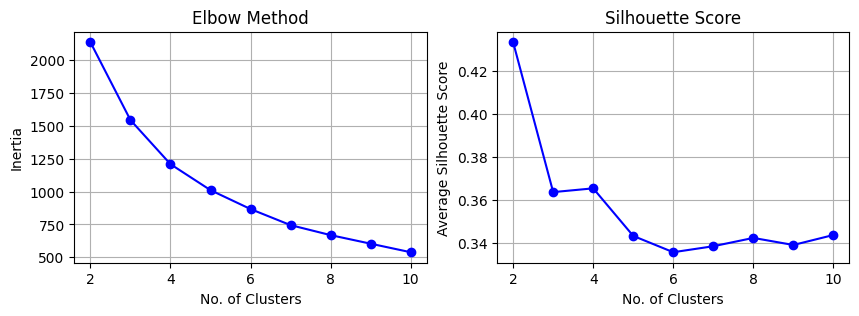

(2, 0.43332490833289466)

In [6]:
trip_advisor_scaled_pca = PCA(n_components=2).fit_transform(trip_advisor_scaled)

inertia_values = []
silhouette_avgs = []

k_range = range(2, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(trip_advisor_scaled_pca)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(trip_advisor_scaled_pca, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(np.arange(2,11),inertia_values,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(122)
plt.plot(np.arange(2,11),silhouette_avgs,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.show()

best_k = k_range[np.argmax(silhouette_avgs)]
best_k, max(silhouette_avgs)


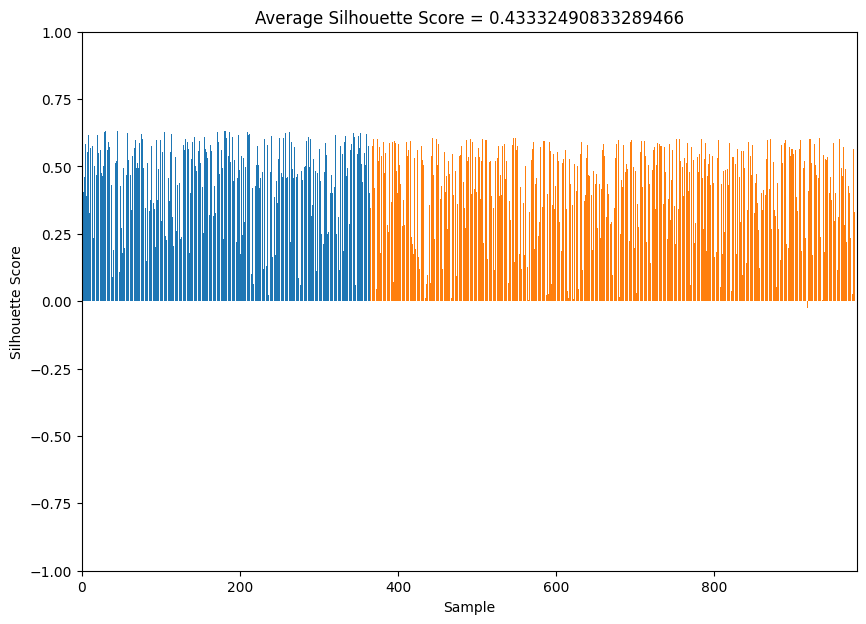

In [10]:
kmeans = KMeans(n_clusters=best_k, n_init=10)
kmeans.fit(trip_advisor_scaled_pca)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(trip_advisor_scaled_pca, cluster_labels)
silhouette_avg = silhouette_score(trip_advisor_scaled_pca, cluster_labels)

plt.figure(figsize=(10, 7))

sample = 0
for i in range(0, best_k):
    sil = silhouette_values[cluster_labels == i]
    plt.bar(np.arange(sample, sample + sil.size), sil)
    sample += sil.size

plt.xlim([0, len(trip_advisor_scaled_pca)])
plt.ylim([-1, 1])

plt.xlabel('Sample')
plt.ylabel('Silhouette Score')
plt.title(f"Average Silhouette Score = {silhouette_avg}")

plt.show()

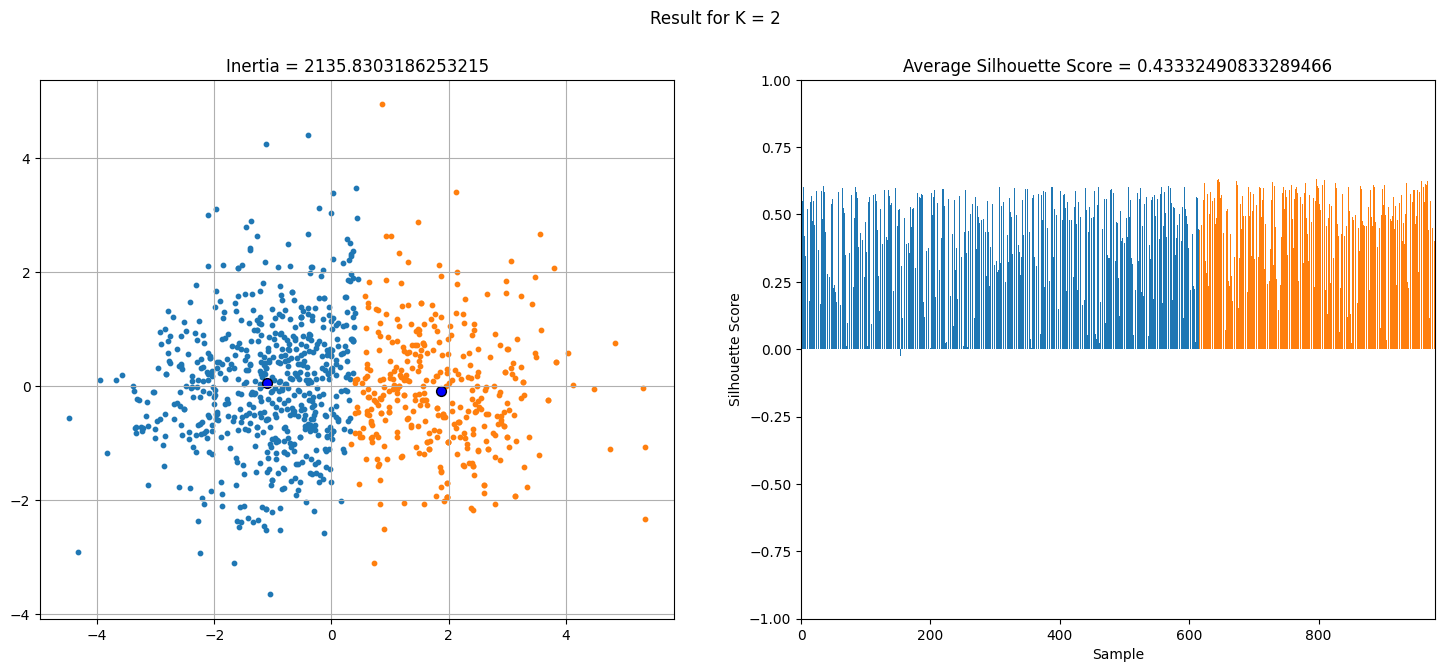

In [14]:
kmeans = KMeans(n_clusters=best_k, n_init=10)
kmeans.fit(trip_advisor_scaled_pca)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(trip_advisor_scaled_pca, cluster_labels)
silhouette_avg = silhouette_score(trip_advisor_scaled_pca, cluster_labels)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
fig.suptitle(f"Result for K = {best_k}")
for i in range(0,best_k):
    ax1.scatter(trip_advisor_scaled_pca[cluster_labels == i,0], trip_advisor_scaled_pca[cluster_labels == i,1], s=10)
ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
ax1.set_title(f"Inertia = {inertia}")
ax1.grid()
sample = 0
for i in range(0,best_k):
    sil = silhouette_values[cluster_labels == i]
    ax2.bar(np.arange(sample,sample + sil.size),sil)
    sample = sample + sil.size
ax2.axis([0, len(trip_advisor_scaled_pca), -1, 1])
ax2.set_xlabel('Sample')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f"Average Silhouette Score = {silhouette_avg}")
plt.show()

# Problem 1c

Threshold (KDE) = 0.006580083253197445


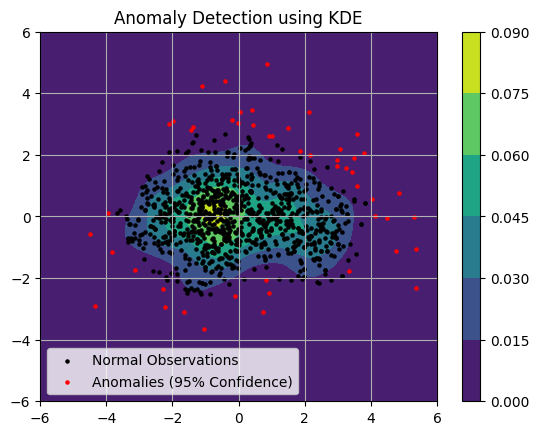

In [26]:

# Make a meshgrid for plotting surfaces
Xp, Yp = np.meshgrid(np.linspace(-6,6),np.linspace(-6,6))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

# Generate the KDE surface as Z
kde = KernelDensity(kernel='gaussian',bandwidth=0.4).fit(trip_advisor_scaled_pca)
Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

# Establish a confidence level of 95% (or 5% cutoff) 
# for the UCL using the quantile of kde_scores.
scores = kde.score_samples(trip_advisor_scaled_pca)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

# Get the anomalous data points
normals = trip_advisor_scaled_pca[scores > threshold,:]
anomals = trip_advisor_scaled_pca[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()